In [ ]:
import os; print(os.path.dirname(os.getcwd()).split('\\')[-1])

 # Who are the Bossy Words?

 On this activity you will use TF-IDF to find the most relevant words on news articles that talk about money in the [Reuters Corpus](https://www.nltk.org/book/ch02.html#reuters-corpus) bundled in `NLTK`. Once you find the most relevant words, you should create a word cloud.

In [2]:
# initial imports
import nltk
from nltk.corpus import reuters
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

plt.style.use("seaborn-whitegrid")
mpl.rcParams["figure.figsize"] = [20.0, 10.0]

 ## Loading the Reuters Corpus

 The first step is to load the Reuters Corpus.

In [3]:
# Download/update the Reuters dataset
nltk.download("reuters")

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\ramgo\AppData\Roaming\nltk_data...


True

 ## Getting the News About Money

 You will analyze only news that talk about _money_. There are two categories on the Reuters Corpus that talk about money: `money-fx` and `money-supply`. In this section, you will filter the news by these categories.

 Take a look into the [Reuters Corpus documentation](https://www.nltk.org/book/ch02.html#reuters-corpus) and check how you can retrieve the categories of a document using the `reuters.categories()` method; write some lines of code to retrieve all the news articles that are under the `money-fx` or the `money-supply` categories.

 **Hint:**
 You can use a comprehension list or a for-loop to accomplish this task.

<font color='red'>Comment</font>

Notice how the following list comprehension is multi-line. Easier?

Q) What is `categories[1]`?

In [4]:
# Getting all documents ids under the money-fx and money-supply categories
categories = ["money-fx", "money-supply"]
all_docs_id = reuters.fileids()
money_news_ids = [
    doc
    for doc in all_docs_id
    if categories[0] in reuters.categories(doc)
    or categories[1] in reuters.categories(doc)
]

print(f"Total number of news articles about money: {len(money_news_ids)}")

Total number of news articles about money: 883


<font color='red'>Comment</font>

The list comprehension above and below could be merged into one mega line. But it's so unreadable!

```python
money_news_ids = [reuters.raw(doc).lower() for doc in all_docs_id if categories[0] in reuters.categories(doc) or categories[1] in reuters.categories(doc)]
```

In [5]:
# Creating the working corpus containing the text from all the news articles about money
money_news = [reuters.raw(doc).lower() for doc in money_news_ids]

# Printing a sample article
print(money_news[78])

u.s. banks likely to lift prime rates again soon
  major u.s. banks may lift prime
  lending rates again within days due to recent increases in
  their borrowing costs and speculation the federal reserve is
  nudging up interest rates to help the dollar, economists said.
      in what was the first prime rate boost since mid-1984, most
  banks in early april lifted their rates a quarter point to
  7-3/4 pct, citing a reduced gap between the prime and their own
  cost of money. that spread has narrowed again.
      "a prime rate increase could happen as soon as tonight,"
  said robert brusca of nikko securities co international inc.
      brusca said a quarter-point prime rate rise to eight pct is
  justified because the spread between banks' cost of funds and
  the prime rate has narrowed to less than three quarters of a
  percentage point.
      he said that spread had averaged around 1.4 percentage
  points since last october until it fell below one point and
  triggered the april pr

 ## Calculating the TF-IDF Weights

 Calculate the TF-IDF weight for each word on the working corpus using the `TfidfVectorizer()` class. Remember to include the `stop_words='english'` parameter.

In [6]:
# Calculating TF-IDF for the working corpus.
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(money_news)

 Create a DataFrame representation of the TF-IDF weights of each term in the working corpus. Use the `sum(axis=0)` method to calculate a measure similar to the term frequency based on the TF-IDF weight, this value will be used to rank the terms for the word cloud creation.

In [7]:
# Creating a DataFrame Representation of the TF-IDF results
money_news_df = pd.DataFrame(
    list(zip(vectorizer.get_feature_names(), np.ravel(X.sum(axis=0)))),
    columns=["Word", "Frequency"],
)

# Order the DataFrame by word frequency in descending order
money_news_df = money_news_df.sort_values(by=["Frequency"], ascending=False)

# Print the top 10 words
money_news_df.head(10)

C:\Users\ramgo\.conda\envs\algotrading\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word,Frequency
5876,said,54.918051
4424,mln,51.533825
1252,bank,49.568996
6397,stg,47.236863
1353,billion,43.544274
4880,pct,41.917193
2461,dollar,37.178790
2939,fed,36.860352
2452,dlrs,36.273205
4265,market,35.086673


 ## Retrieving the Top Words

 In order to create the word cloud you should get the top words, in this case we will use a thumb rule that has been empirically tested by some NLP experts that states that words with a frequency between 10 and 30 might be the most relevant in a corpus.

 Following this rule, create a new DataFrame containing only those words with the mentioned frequency.

In [8]:
top_words = money_news_df[money_news_df["Frequency"] >= 10]

top_words.head(10)

,Word,Frequency
5876,said,54.918051
4424,mln,51.533825
1252,bank,49.568996
6397,stg,47.236863
1353,billion,43.544274
4880,pct,41.917193
2461,dollar,37.178790
2939,fed,36.860352
2452,dlrs,36.273205
4265,market,35.086673


In [9]:
# Top words will be those with a frequency between 10 ans 30 (thumb rule)
top_words = money_news_df[
    (money_news_df["Frequency"] >= 10) & (money_news_df["Frequency"] <= 30)
]

top_words.head(10)

,Word,Frequency
7324,yen,28.343276
5913,says,26.248262
3844,japan,23.927655
2783,exchange,22.504089
2158,dealers,22.503656
5365,rate,21.277388
7203,week,20.247803
5366,rates,19.969733
1620,central,18.079040
2105,currency,17.370210


 ## Creating Word Cloud

 Now you have all the pieces needed to create a word cloud based on TF-IDF weights, so use the `WordCloud` library to create it.

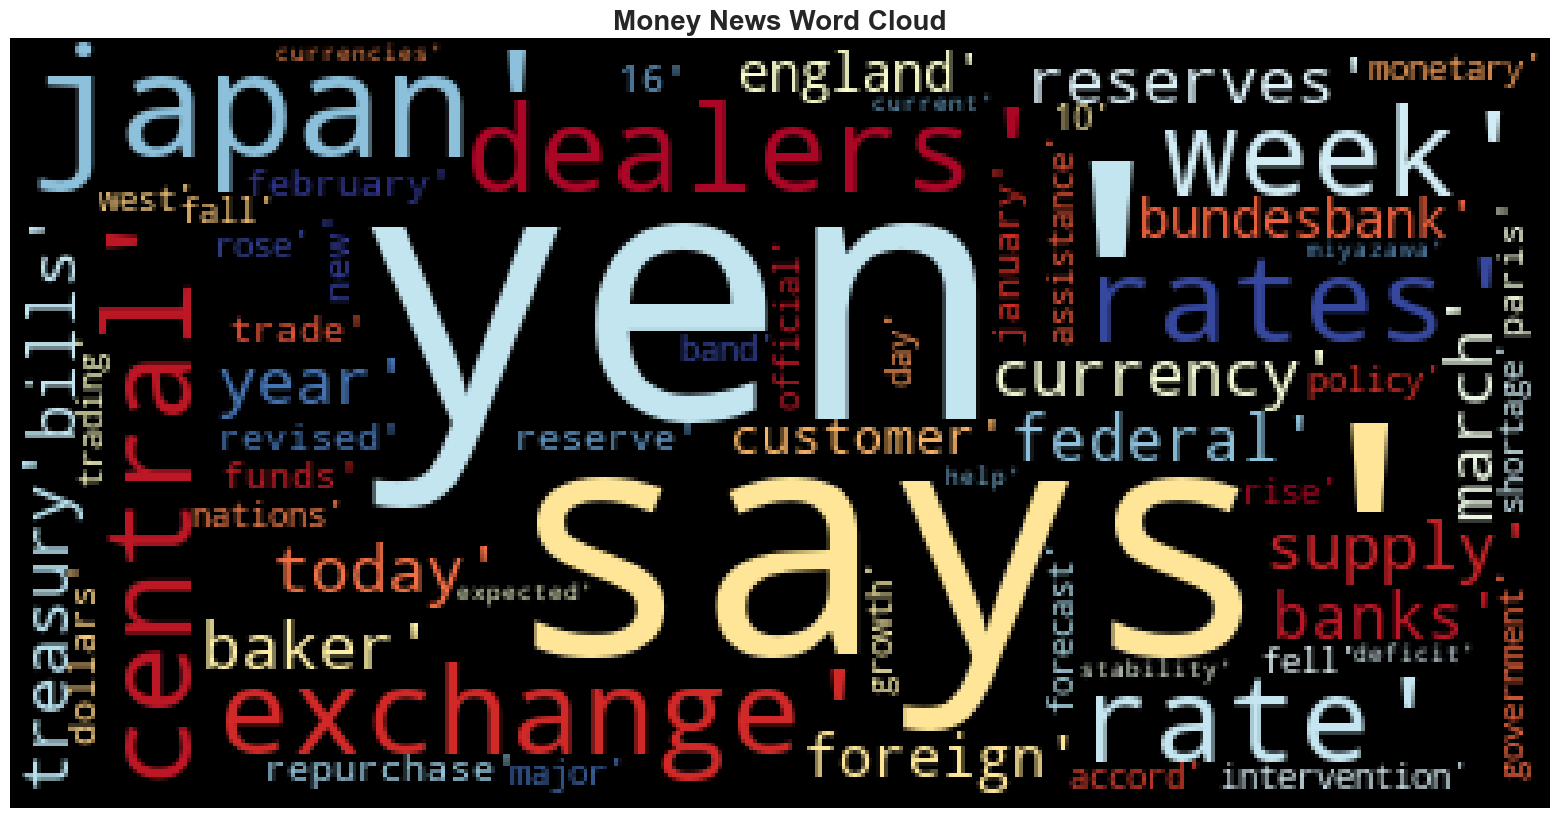

In [10]:
# Create a string list of terms to generate the word cloud
terms_list = str(top_words["Word"].tolist())

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Money News Word Cloud", fontdict=fontdict)
plt.show()

## Challenge: Looking for Documents that Contains Top Words

 Finally you might find interesting to search those articles that contain the most relevant words. Create a function called `retrieve_docs(terms)` that receive a list of terms as parameter and extract from the working corpus all those news articles that contains the search terms. On this function you should use the `reuters.words()` method to retrieve the tokenized version of each article as can be seen on the [Reuters Corpus documentation](https://www.nltk.org/book/ch02.html#reuters-corpus).

 **Hint:** To find any occurrence of the search terms you might find quite useful [this post on StackOverflow](https://stackoverflow.com/a/25102099/4325668), also you should lower case all the words to ease your terms search.

<font color='red'>Comment</font>

Explore how this upcoming function works...

In [11]:
terms = ["yen", "japan"]

# print(money_news_ids[0:2])
for doc_id in money_news_ids[0:2]:
    print(doc_id)
    
    for word in reuters.words(doc_id)[0:5]:
        print(word)
        
        if any(term in word.lower() for term in terms):
            print(term)

test/14849
BUNDESBANK
ALLOCATES
6
.
1
test/14861
U
.
K
.
MONEY


In [12]:
def retrieve_docs(terms):
    result_docs = []
    for doc_id in money_news_ids:
        found_terms = [
            word
            for word in reuters.words(doc_id)
            if any(term in word.lower() for term in terms)
        ]
        if len(found_terms) > 0:
            result_docs.append(doc_id)
    return result_docs

 ### Question 1: How many articles talk about Yen?

In [13]:
len(retrieve_docs(["yen"]))

182

### Question 2: How many articles talk about Japan or Banks?

In [14]:
len(retrieve_docs(["japan", "banks"]))

326

 ### Question 3: How many articles talk about England or Dealers?

In [15]:
len(retrieve_docs(["england", "dealers"]))

299